# Pyfolio Integration

Alphalens can simulate the performance of a portfolio where the factor values are use to weight stocks. Once the portfolio is built, it can be analyzed by Pyfolio. For details on how this portfolio is built see:
- alphalens.performance.factor_returns
- alphalens.performance.cumulative_returns 
- alphalens.performance.create_pyfolio_input

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
try: 
    import pyfolio as pf
except ImportError:
    print('Install pyfolio using `pip install pyfolio-reloaded` first')

In [3]:
import alphalens
import pyfolio
import pandas as pd

In [4]:
%matplotlib inline

## Load Data

First load some stocks data

In [5]:
tickers = [ 'ACN', 'ATVI', 'ADBE', 'AMD', 'AKAM', 'ADS', 'GOOGL', 'GOOG', 'APH', 'ADI', 'ANSS', 'AAPL',
'AVGO', 'CA', 'CDNS', 'CSCO', 'CTXS', 'CTSH', 'GLW', 'CSRA', 'DXC', 'EBAY', 'EA', 'FFIV', 'FB',
'FLIR', 'IT', 'GPN', 'HRS', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'JNPR', 'KLAC', 'LRCX', 'MA', 'MCHP',
'MSFT', 'MSI', 'NTAP', 'NFLX', 'NVDA', 'ORCL', 'PAYX', 'PYPL', 'QRVO', 'QCOM', 'RHT', 'CRM', 'STX',
'AMG', 'AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'AJG', 'AIZ', 'BAC', 'BK', 'BBT', 'BRK.B', 'BLK', 'HRB',
'BHF', 'COF', 'CBOE', 'SCHW', 'CB', 'CINF', 'C', 'CFG', 'CME', 'CMA', 'DFS', 'ETFC', 'RE', 'FITB', 'BEN',
'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JPM', 'KEY', 'LUK', 'LNC', 'L', 'MTB', 'MMC', 'MET', 'MCO', 'MS',
'NDAQ', 'NAVI', 'NTRS', 'PBCT', 'PNC', 'PFG', 'PGR', 'PRU', 'RJF', 'RF', 'SPGI', 'STT', 'STI', 'SYF', 'TROW',
'ABT', 'ABBV', 'AET', 'A', 'ALXN', 'ALGN', 'AGN', 'ABC', 'AMGN', 'ANTM', 'BCR', 'BAX', 'BDX', 'BIIB', 'BSX',
'BMY', 'CAH', 'CELG', 'CNC', 'CERN', 'CI', 'COO', 'DHR', 'DVA', 'XRAY', 'EW', 'EVHC', 'ESRX', 'GILD', 'HCA',
'HSIC', 'HOLX', 'HUM', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'IQV', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 'MTD',
'MYL', 'PDCO', 'PKI', 'PRGO', 'PFE', 'DGX', 'REGN', 'RMD', 'SYK', 'TMO', 'UNH', 'UHS', 'VAR', 'VRTX', 'WAT',
'MMM', 'AYI', 'ALK', 'ALLE', 'AAL', 'AME', 'AOS', 'ARNC', 'BA', 'CHRW', 'CAT', 'CTAS', 'CSX', 'CMI', 'DE',
'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FLS', 'FLR', 'FTV', 'FBHS', 'GD', 'GE', 'GWW',
'HON', 'INFO', 'ITW', 'IR', 'JEC', 'JBHT', 'JCI', 'KSU', 'LLL', 'LMT', 'MAS', 'NLSN', 'NSC', 'NOC', 'PCAR',
'PH', 'PNR', 'PWR', 'RTN', 'RSG', 'RHI', 'ROK', 'COL', 'ROP', 'LUV', 'SRCL', 'TXT', 'TDG', 'UNP', 'UAL',
'AES', 'LNT', 'AEE', 'AEP', 'AWK', 'CNP', 'CMS', 'ED', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'ES', 'EXC']

### YFinance Download

In [6]:
try: 
    import yfinance as yf
except ImportError:
    print('Install yfinance using `pip install yfinance` first')

In [7]:
try: 
    import pandas_datareader.data as web
except ImportError:
    print('Install pandas-datareader using `pip install pandas_datareader` first')

In [8]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

df = web.get_data_yahoo(tickers, start='2015-01-01',  end='2017-01-01')
df.index = pd.to_datetime(df.index, utc=True)

[*********************100%%**********************]  247 of 247 completed

35 Failed downloads:
['FLIR', 'CTXS', 'BBT', 'RE', 'KSU', 'FBHS', 'ABC', 'ARNC', 'AGN', 'MYL', 'FB', 'CELG', 'ATVI', 'ETFC', 'VAR', 'RHT', 'PBCT', 'NLSN', 'HRS', 'RTN', 'CERN', 'ADS', 'JEC', 'ALXN', 'LLL', 'INFO', 'BRK.B', 'ANTM', 'PKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
['STI', 'IR', 'BHF', 'CA']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1483246800")
['LUK', 'BCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2017-01-01)')


### Data Formatting

In [9]:
df = df.stack()
df.index.names = ['date', 'asset']
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 105915 entries, (Timestamp('2015-01-02 00:00:00+0000', tz='UTC'), 'A') to (Timestamp('2016-12-30 00:00:00+0000', tz='UTC'), 'XRAY')
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Adj Close  105915 non-null  float64
 1   Close      105915 non-null  float64
 2   High       105915 non-null  float64
 3   Low        105915 non-null  float64
 4   Open       105915 non-null  float64
 5   Volume     105915 non-null  float64
dtypes: float64(6)
memory usage: 5.3+ MB


## Compute Factor

We'll compute a simple mean reversion factor looking at recent stocks performance: stocks that performed well in the last 5 days will have high rank and vice versa.

In [10]:
factor = df.loc[:,'Open'].unstack('asset')
factor = -factor.pct_change(5)
factor = factor.stack()

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestats will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, before the trading starts every day, we observe yesterday factor values. The price we pass to alphalens is the next available price after that factor observation: the daily open price that will be used as assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument). The retuns computed by Alphalens will therefore based on assets open prices.

In [11]:
pricing = df.loc[:,'Open'].unstack('asset').iloc[1:]

## Run Alphalens Analysis

### Get Input Data

In [12]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor,
                                                                   pricing,
                                                                   periods=(1, 3, 5),
                                                                   quantiles=5,
                                                                   bins=None)

Dropped 1.0% entries from factor data: 1.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


### Summary Tear Sheet

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.750000  0.074766 -0.041880  0.036708  21022  20.251628
2               -0.113547  0.094112 -0.013849  0.020762  20624  19.868213
3               -0.080349  0.109978 -0.001755  0.019661  20673  19.915418
4               -0.046965  0.127395  0.010253  0.020199  20621  19.865323
5               -0.028090  0.428571  0.037104  0.033819  20864  20.099418

Returns Analysis


1D     3D     5D
Ann. alpha                                     0.300  0.135  0.101
beta                                           0.102  0.045  0.051
Mean Period Wise Return Top Quantile (bps)     4.980  2.483  2.024
Mean Period Wise Return Bottom Quantile (bps) -2.982 -1.755 -1.790
Mean Period Wise Spread (bps)                  7.962  4.234  3.808

Information Analysis


1D     3D     5D
IC Mean           0.015  0.012  0.016
IC Std.           0.178  0.175  0.175
Risk-Adjusted IC  0.084  0.068  0.094
t-stat(IC)        1.870  1.507  2.080
p-value(IC)       0.062  0.133  0.038
IC Skew           0.031  0.113  0.042
IC Kurtosis       0.244  0.209  0.318

Turnover Analysis


1D     3D     5D
Quantile 1 Mean Turnover   0.347  0.600  0.786
Quantile 2 Mean Turnover   0.607  0.746  0.801
Quantile 3 Mean Turnover   0.648  0.762  0.782
Quantile 4 Mean Turnover   0.604  0.744  0.797
Quantile 5 Mean Turnover   0.350  0.596  0.782

1D     3D     5D
Mean Factor Rank Autocorrelation  0.749  0.358 -0.016

<Figure size 640x480 with 0 Axes>

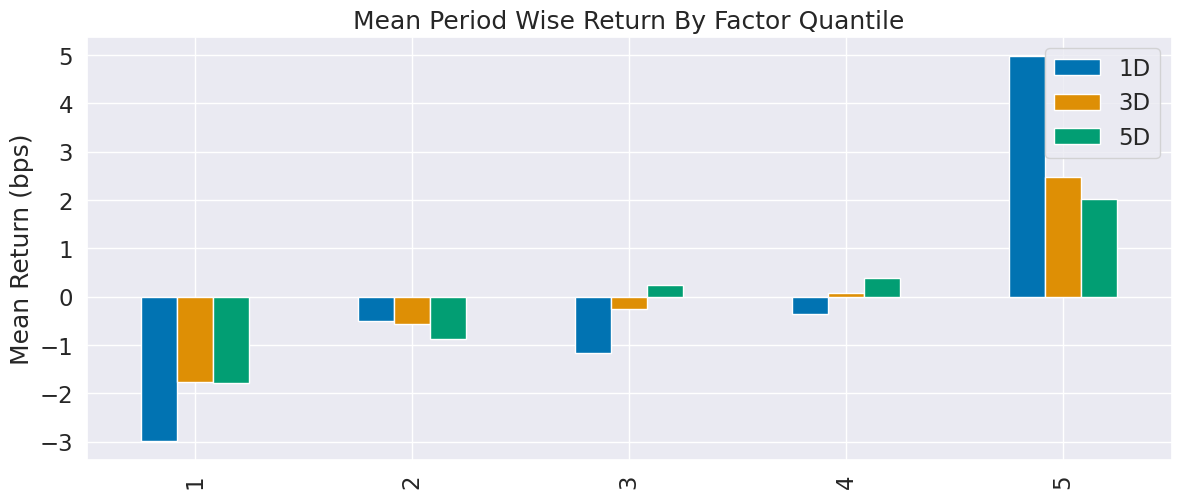

In [13]:
alphalens.tears.create_summary_tear_sheet(factor_data);

## Run Pyfolio Analysis

### Get Input Data

We can see in Alphalens analysis that quantiles 1 and 5 are the most predictive so we'll build a portfolio data using only those quantiles.

In [14]:
pf_returns, pf_positions, pf_benchmark = \
    alphalens.performance.create_pyfolio_input(factor_data,
                                               period='1D',
                                               capital=100000,
                                               long_short=True,
                                               group_neutral=False,
                                               equal_weight=True,
                                               quantiles=[1,5],
                                               groups=None,
                                               benchmark_period='1D')

### Pyfolio Tearsheet

Now that we have prepared the data we can run Pyfolio functions

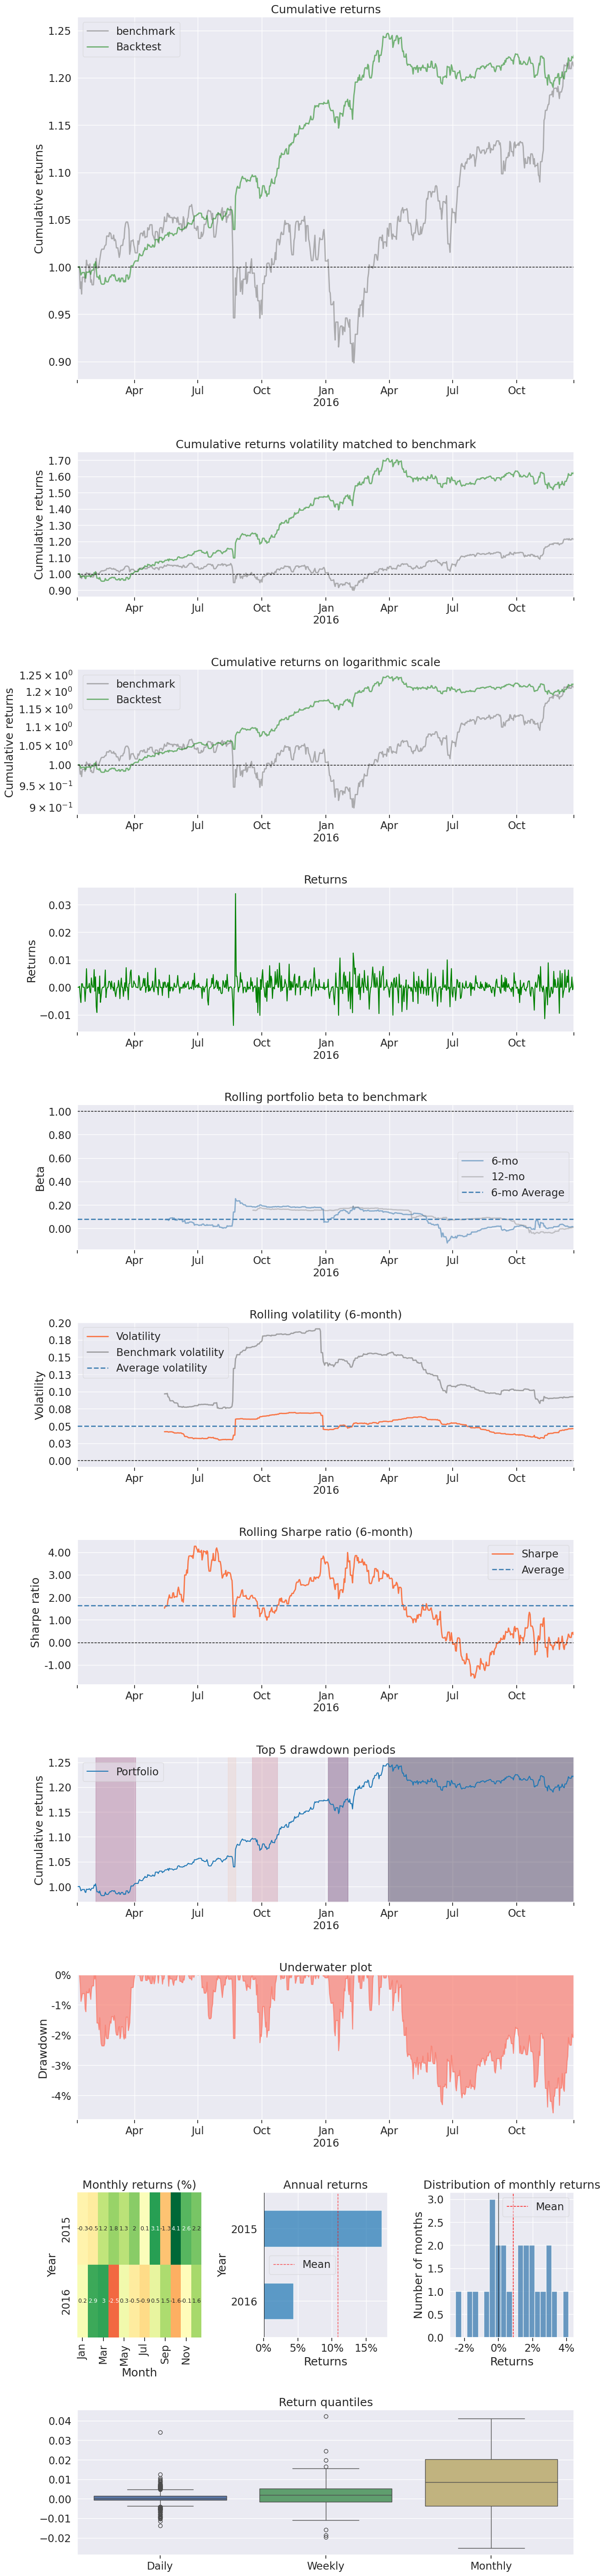

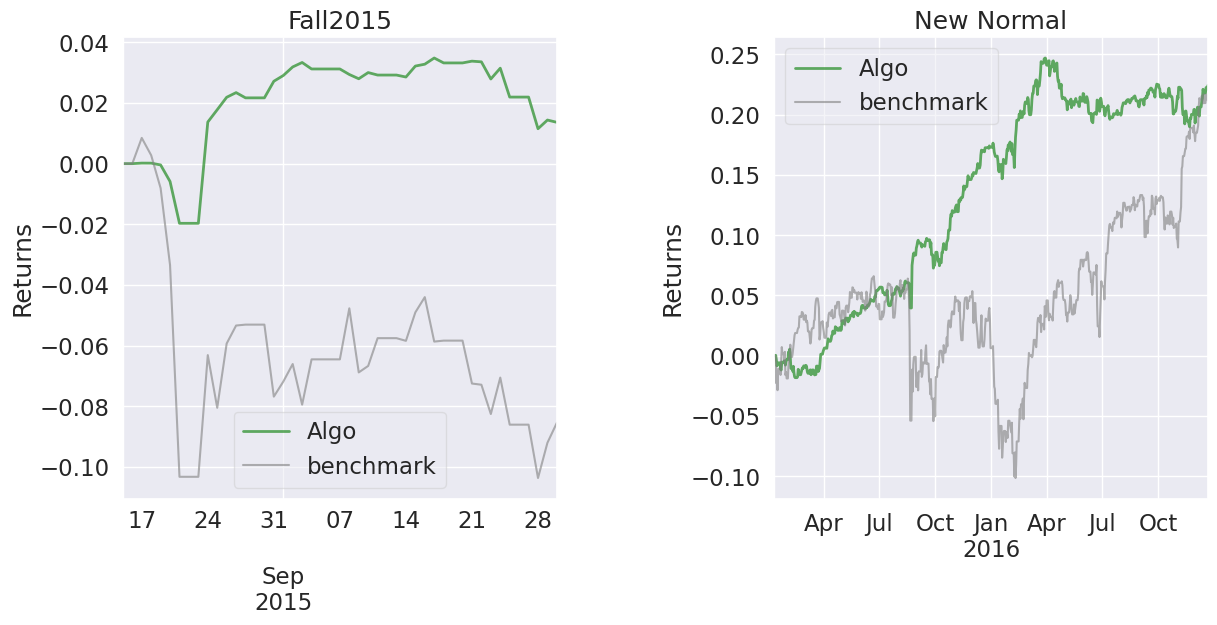

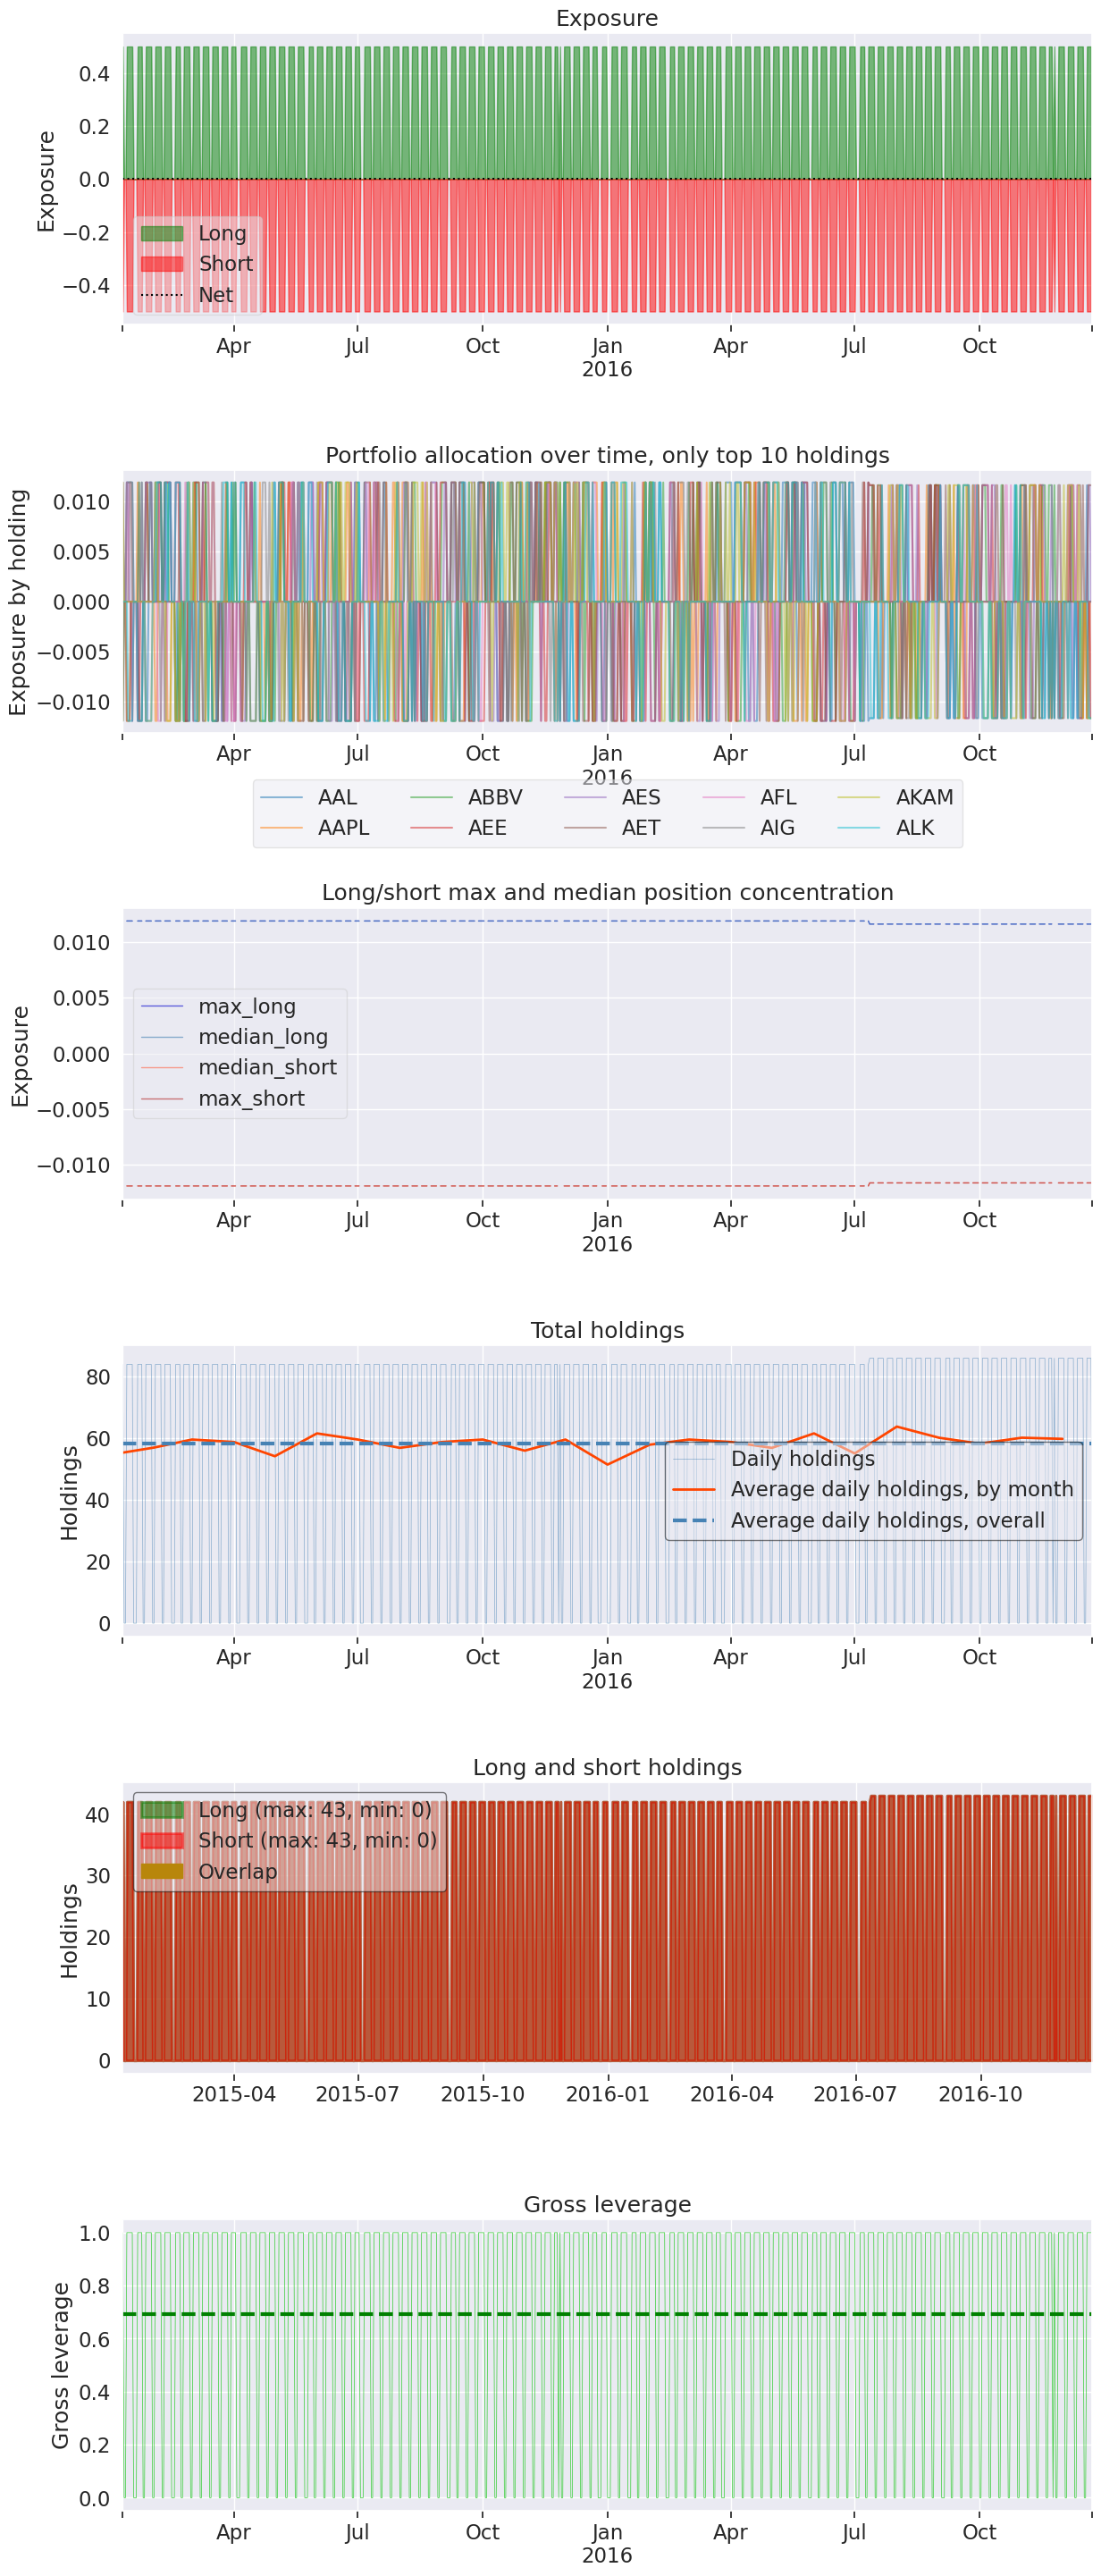

In [15]:
pyfolio.tears.create_full_tear_sheet(pf_returns,
                                     positions=pf_positions,
                                     benchmark_rets=pf_benchmark)

## Subset Performance

### Weekday Analysis

Sometimes it might be useful to analyze subets of your factor data, for example it could be interesting to see the comparison of your factor in different days of the week. Below we'll see how to select and analyze factor data corresponding to Mondays, the positions will be held the for a period of 5 days

In [16]:
monday_factor_data = factor_data[ factor_data.index.get_level_values('date').weekday == 0 ]

In [17]:
pf_returns, pf_positions, pf_benchmark = \
    alphalens.performance.create_pyfolio_input(monday_factor_data,
                                               period='5D',
                                               capital=100000,
                                               long_short=True,
                                               group_neutral=False,
                                               equal_weight=True,
                                               quantiles=[1,5],
                                               groups=None,
                                               benchmark_period='1D')

### Pyfolio Tearsheet

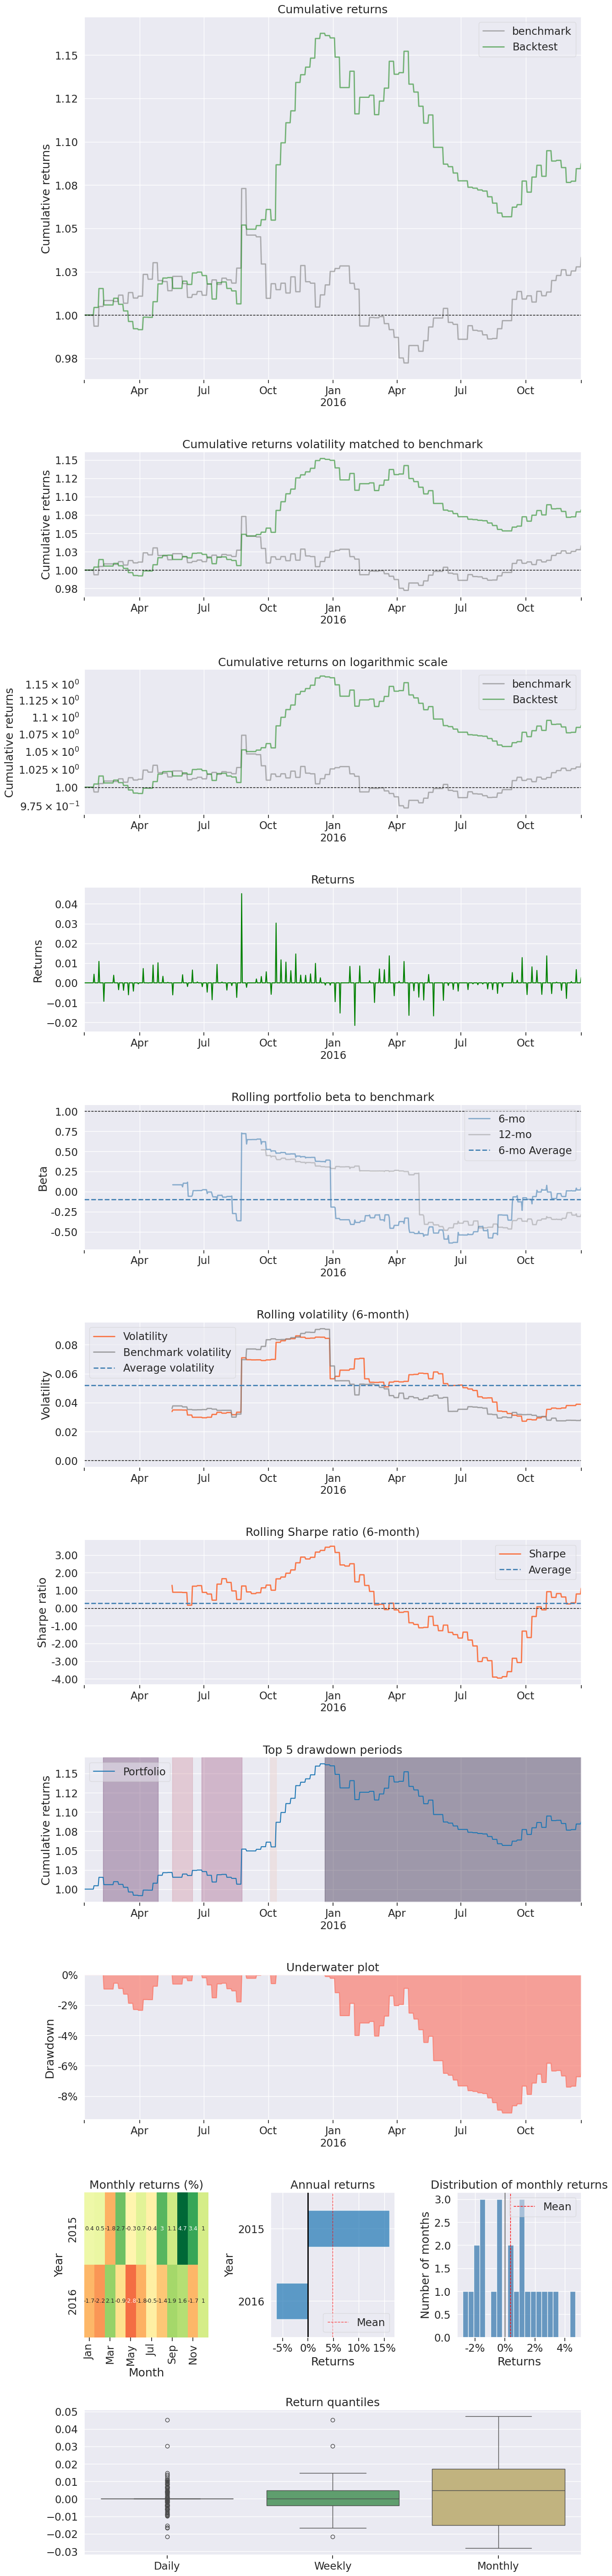

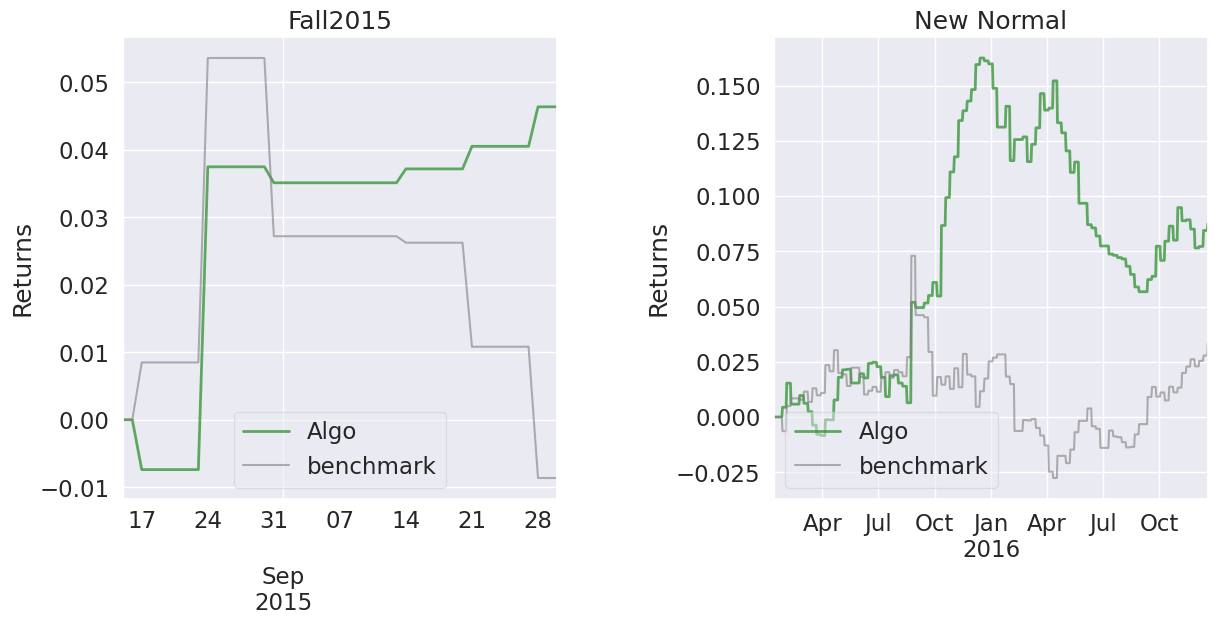

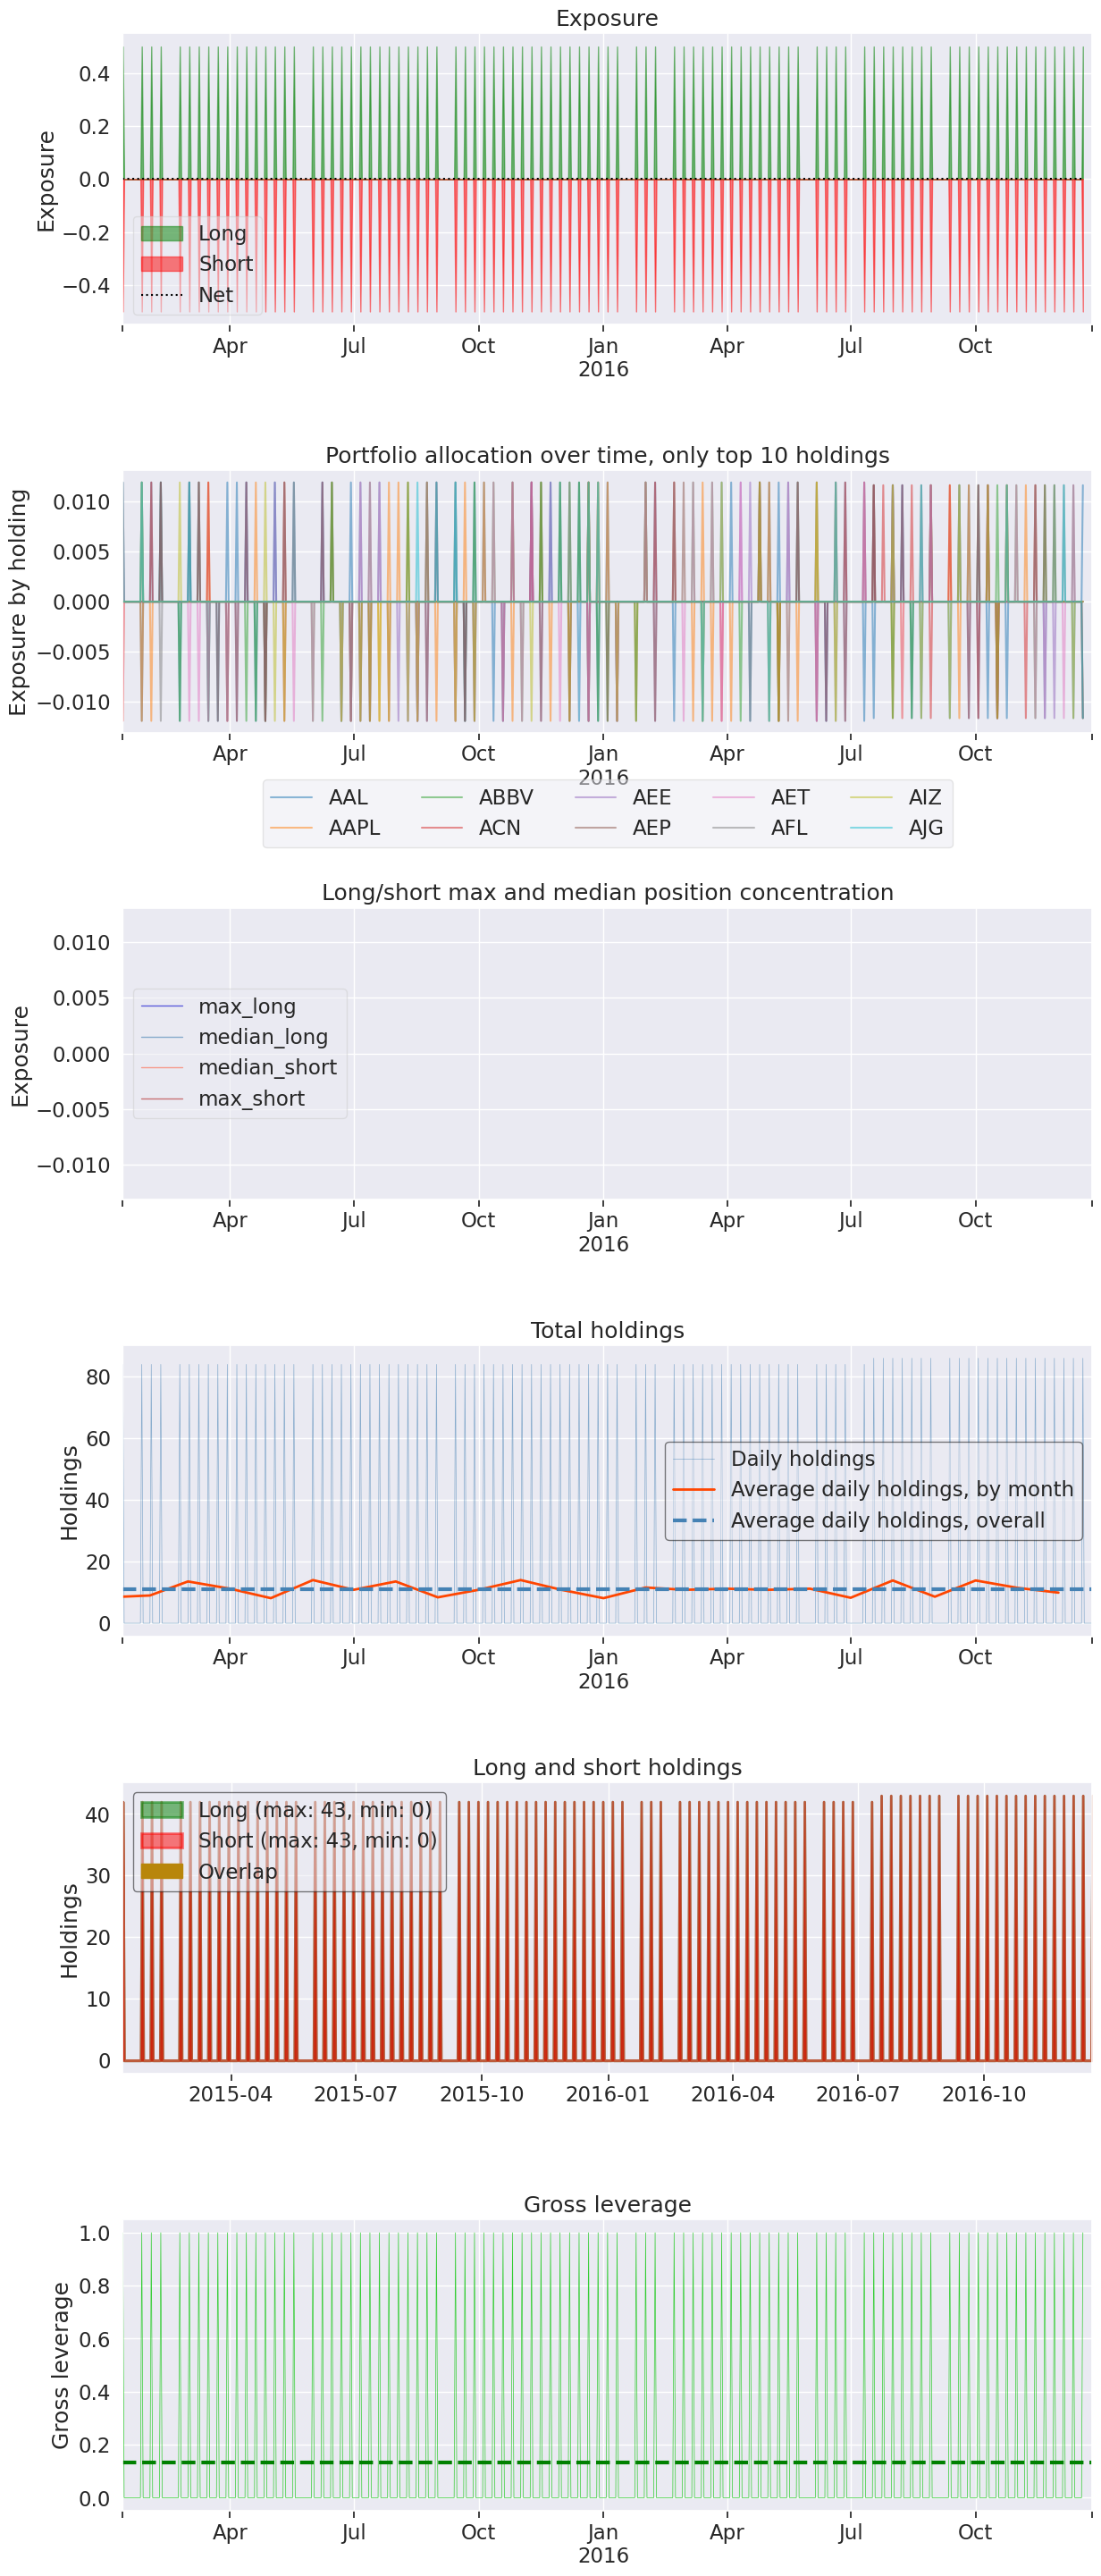

In [18]:
pyfolio.tears.create_full_tear_sheet(pf_returns,
                                     positions=pf_positions,
                                     benchmark_rets=pf_benchmark)